In [15]:
import numpy as np
from matplotlib import pyplot as plt

In [16]:
def find_k(num):
    i = 0
    ta = []
    while True:
        if 2**i - 1 >= i+num:
            break
        i += 1
    return i

def size_all(size, pType):
    if pType == 0:
        return find_k(size[2] * size[3] * 32) * size[0] * size[1]
    else:
        return find_k(size[2] * size[3] * 9) * size[0] * size[1]

def plotOvS(size, fSign, fFrac):
    length = len(size)
    print(length)
    iSign = fSign.argsort()[::-1]
    iFrac = fFrac.argsort()[::-1]
    i = 0
    j = 0
    openList = []
    while True:
        if (j == length and i < length) or (i < length and fSign[iSign[i]] > fFrac[iFrac[j]]):
            openList += [(fSign[iSign[i]], iSign[i], 0)]
            i += 1
        else:
            if j == length:
                break
            openList += [(fFrac[iFrac[j]], iFrac[j], 1)]
            j += 1

    openList += [(0., 0,0)]
    acc = []
    for i in range(length * 2):
        acc  += [openList[i+1][0]]

    overheadList = []
    overhead = 0
    print (openList)
    for i in range(len(openList) - 1):
        item = openList[i]
        flag = False
        for j in range(i):
            if openList[j][1] == item[1]:
                flag = True
        overhead += size_all(size[item[1]], item[0])
        if flag:
            overhead -= size_all(size[item[1]], 1)
        overheadList += [overhead]
    print overheadList

    plt.scatter(overheadList, acc)
    plt.plot(overheadList, acc)
    plt.xlabel('memory overhead')
    plt.ylabel('SSIPP')
    return overheadList, acc

9
[(2.36, 8, 0), (0.96, 0, 0), (0.72, 8, 1), (0.28, 2, 0), (0.26, 4, 0), (0.24, 1, 0), (0.22, 4, 1), (0.22, 0, 1), (0.21, 7, 0), (0.2, 2, 1), (0.19, 5, 0), (0.13, 1, 1), (0.11, 3, 1), (0.08, 6, 0), (0.08, 3, 0), (0.0, 7, 1), (0.0, 6, 1), (0.0, 5, 1), (0.0, 0, 0)]
[7680, 12288, 12288, 73728, 221184, 344064, 344064, 344064, 491520, 491520, 638976, 638976, 786432, 1044480, 1044480, 1118208, 1191936, 1265664]


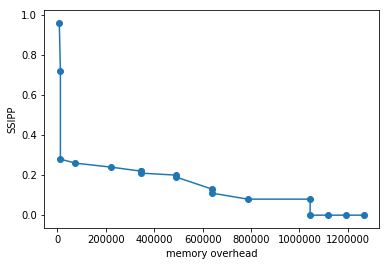

In [17]:
sizeNIN = [
    (192, 3, 5, 5),
    (160, 192, 1, 1),
    (96, 160, 1, 1),
    (192, 96, 5, 5),
    (192, 192, 1, 1),
    (192, 192, 1, 1),
    (192, 192, 3, 3),
    (192, 192, 1, 1),
    (10, 192, 1, 1),
    ]

fSignNIN = np.array([0.96, 0.24, 0.28, 0.08, 0.26, 0.19, 0.08, 0.21, 2.36])
fFracNIN = np.array([0.22, 0.13, 0.20, 0.11, 0.22, 0.00, 0.00, 0.00, 0.72])
(xNIN, yNIN) = plotOvS(sizeNIN, fSignNIN, fFracNIN)

5
[(28.09, 0, 0), (6.43, 1, 0), (2.08, 2, 0), (0.9, 4, 0), (0.43, 0, 1), (0.41, 2, 1), (0.3, 4, 1), (0.27, 3, 0), (0.25, 3, 1), (0.22, 1, 1), (0.0, 0, 0)]
[336, 32592, 158032, 158048, 158048, 158048, 158048, 659808, 659808, 659808]


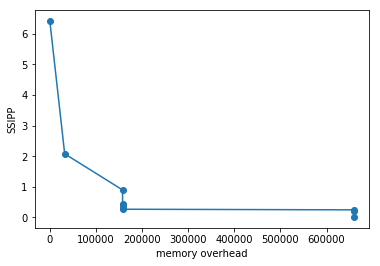

In [18]:
sizeRes = [
    (16, 3, 3, 3),
    (16*9*2, 16, 3, 3),
    (32*9*2 - 16, 32, 3, 3),
    (64*9*2 - 32, 64, 3, 3),
    (1, 1, 64, 100),
    ]

fSignRes = np.array([28.09, 6.43, 2.08, 0.27, 0.90])
fFracRes = np.array([0.43, 0.22, 0.41, 0.25, 0.30])
xRes, yRes = plotOvS(sizeRes, fSignRes, fFracRes)

6
[(4.18, 0, 0), (0.88, 0, 1), (0.14, 3, 1), (0.14, 2, 1), (0.13, 1, 1), (0.12, 1, 0), (0.11, 2, 0), (0.09, 4, 1), (0.06, 4, 0), (0.06, 3, 0), (0.01, 5, 1), (0.01, 5, 0), (0.0, 0, 0)]
[1344, 1344, 116032, 173376, 202048, 202048, 202048, 431424, 431424, 431424, 431450, 431450]


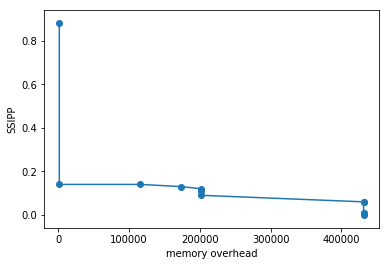

In [19]:
sizeV = [
    (64, 3, 3, 3),
    (64, 64, 3, 3),
    (128, 64, 3, 3),
    (128, 128, 3, 3),
    (256, 128, 3, 3),
    (1,1, 1000, 4096)
    ]

fSignV = np.array([4.18, 0.12, 0.11, 0.06,  0.06, 0.01])
fFracV = np.array([0.88, 0.13, 0.14, 0.14, 0.09, 0.01])
xV, yV = plotOvS(sizeV, fSignV, fFracV)

In [20]:
xNIN, yNIN, xRes, yRes, xV, yV = np.array(xNIN), np.array(yNIN), np.array(xRes), np.array(yRes), np.array(xV), np.array(yV)

In [21]:
xNIN = xNIN / float(xNIN.max())
yNIN = yNIN / float(yNIN.max())
xRes = xRes / float(xRes.max())
yRes = yRes / float(yRes.max())
xV   = xV / float(xV.max())
yV   = yV / float(yV.max())

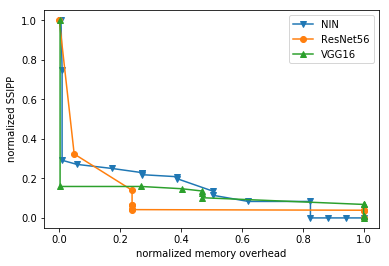

In [22]:
label = ['NIN', 'ResNet56', 'VGG16']
plt.plot(xNIN, yNIN, marker = 'v')
plt.plot(xRes, yRes, marker = 'o')
plt.plot(xV,yV, marker = '^')
plt.legend(label)
plt.ylabel('normalized SSIPP')
plt.xlabel('normalized memory overhead')
#plt.scatter(xNIN, yNIN)
#plt.scatter(xRes, yRes)
#plt.scatter(xV,yV)
plt.savefig('OVS')

In [13]:
print xV

[0.00311508 0.00311508 0.26893499 0.40184494 0.46829992 0.46829992
 0.46829992 0.99993974 0.99993974 0.99993974 1.         1.        ]
